In [12]:
import torch
import torchvision
import torchvision.transforms as transforms

# data load
batch_size = 100
test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False,
                                            transform=transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, shuffle=False)

original_images = []
for images,_ in test_loader:
    original_images.append(images)

original_data = torch.stack(original_images, dim=0)
segmented_data = torch.load('segmented_data.pt')
augmented_data = original_data


# data augmentation
with torch.no_grad():
    for i in range(len(original_data)):
        images_batch = original_data[i]
        for j in range(len(images_batch)):
            image = images_batch[j]
            
            # image 크기 32x32 중 (m,n)번째 pixel
            for m in range(image.shape[1]):
                for n in range(image.shape[2]):
                    
                    # segmentation label이 0으로 배경인 pixel에 대해
                    # RGB 모두 0으로 설정해 검정 배경으로 만들어줌
                    if segmented_data[i][j][m][n] == 0:
                        # i번째 batch의 j번째 image의 (m,n) 위치의 RGB intensity값 0으로 설정
                        augmented_data[i][j][0][m][n] = 0
                        augmented_data[i][j][1][m][n] = 0
                        #augmented_data[i][j][2][m][n] = 0
        print(i+1," batch complete")

1  batch complete
2  batch complete
3  batch complete
4  batch complete
5  batch complete
6  batch complete
7  batch complete
8  batch complete
9  batch complete
10  batch complete
11  batch complete
12  batch complete
13  batch complete
14  batch complete
15  batch complete
16  batch complete
17  batch complete
18  batch complete
19  batch complete
20  batch complete
21  batch complete
22  batch complete
23  batch complete
24  batch complete
25  batch complete
26  batch complete
27  batch complete
28  batch complete
29  batch complete
30  batch complete
31  batch complete
32  batch complete
33  batch complete
34  batch complete
35  batch complete
36  batch complete
37  batch complete
38  batch complete
39  batch complete
40  batch complete
41  batch complete
42  batch complete
43  batch complete
44  batch complete
45  batch complete
46  batch complete
47  batch complete
48  batch complete
49  batch complete
50  batch complete
51  batch complete
52  batch complete
53  batch complete
54

In [15]:
print(augmented_data.shape)
torch.save(augmented_data, 'blue_augmented_data.pt')

torch.Size([100, 100, 3, 32, 32])


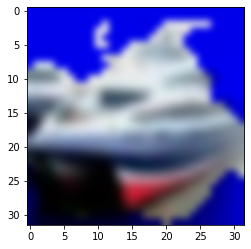

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(transforms.ToPILImage()(augmented_data[0][1]), interpolation="bicubic")